In [7]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split

We will use the cars dataset to try to predict CO2 by weight and volume. We have very few observations

In [8]:
regdf=pd.read_csv('https://www.w3schools.com/python/cars.csv')

In [16]:
regdf.shape


(36, 6)

## Question 1

Let's try to predict CO2 this via linear regression and see how well it does.

Plot the regression line over the scatterplot

In [11]:
reg = smf.ols('CO2 ~ Volume+Weight',regdf).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           0.000411
Time:                        17:10:29   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6947      5.564     14.322      0.000      68.374      91.016
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
regdf['preds_reg']=reg.predict()

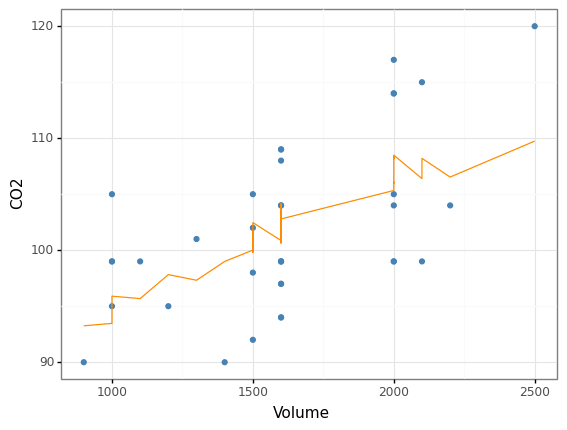

<ggplot: (8782414693491)>

In [14]:
(ggplot(regdf, aes(x='Volume', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Volume', y='preds_reg'), color='darkorange' )+
 theme_bw()
       )

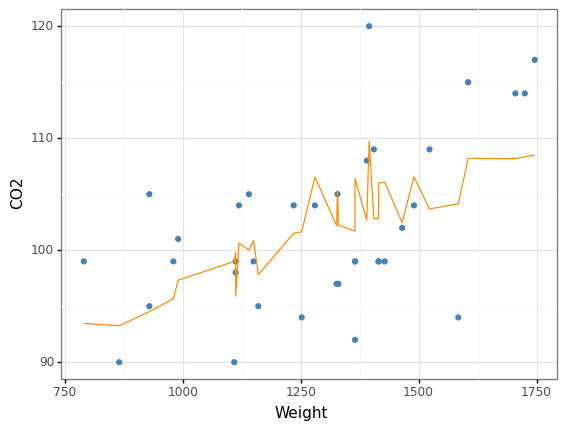

<ggplot: (8782429758227)>

In [15]:
(ggplot(regdf, aes(x='Weight', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Weight', y='preds_reg'), color='darkorange' )+
 theme_bw()
       )

## Question 2

Repeat question 1 with Random forest and Knn

Plot the predictions over the scatterplot

In [29]:
CO2_knn = knn(n_neighbors=3).fit(X=regdf[['Volume', 'Weight']],
                                       y=regdf['CO2'])


In [30]:
CO2_knn.score(X=regdf[['Volume', 'Weight']],
                                       y=regdf['CO2'])

0.6062782958911155

In [31]:
regdf['pred_knn'] = CO2_knn.predict(regdf[['Volume', 'Weight']])

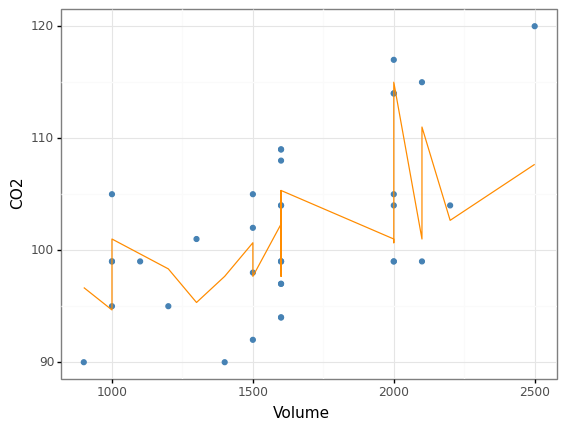

<ggplot: (8782445229608)>

In [32]:
(ggplot(regdf, aes(x='Volume', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Volume', y='pred_knn'), color='darkorange' )+
 theme_bw()
       )

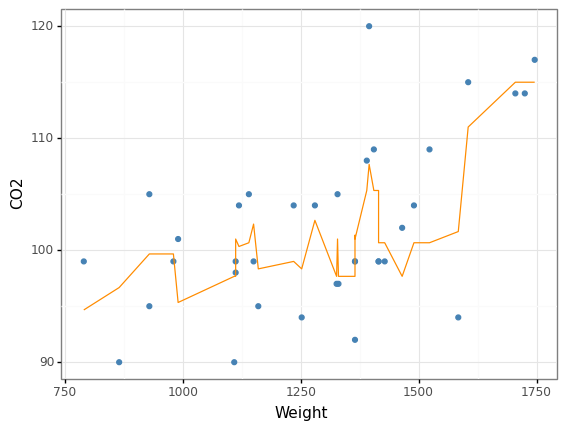

<ggplot: (8782429674804)>

In [33]:
(ggplot(regdf, aes(x='Weight', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Weight', y='pred_knn'), color='darkorange' )+
 theme_bw()
       )

In [39]:
CO2_rf = rf(n_estimators=100,
                max_depth=5).fit(regdf[['Volume', 'Weight']],
                                 regdf['CO2'])


In [40]:
CO2_rf.score(X=regdf[['Volume', 'Weight']],
                                       y=regdf['CO2'])

0.821346159382635

In [41]:
regdf['pred_rf'] = CO2_rf.predict(regdf[['Volume', 'Weight']])

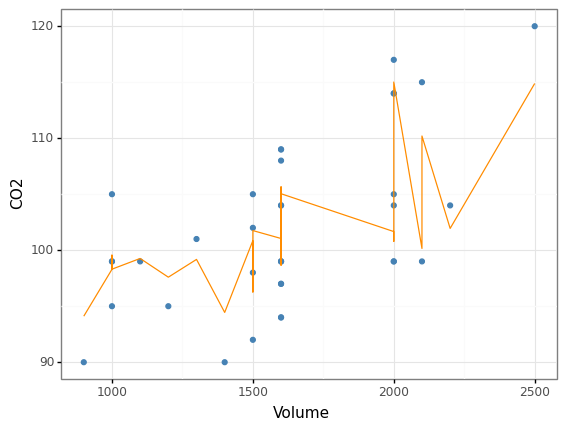

<ggplot: (8782414942431)>

In [42]:
(ggplot(regdf, aes(x='Volume', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Volume', y='pred_rf'), color='darkorange' )+
 theme_bw()
       )

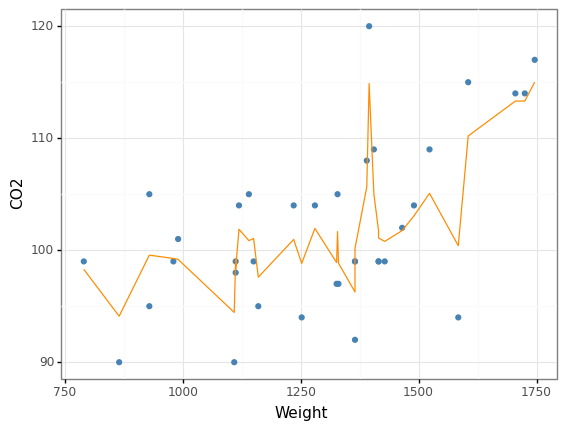

<ggplot: (8782430106582)>

In [43]:
(ggplot(regdf, aes(x='Weight', y='CO2'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='Weight', y='pred_rf'), color='darkorange' )+
 theme_bw()
       )

# Question 3 

We have very few observartions, but let's see if using the test split can help us find the optimal hyperparameters for knn and random forests (Spoiler: we might not do great)

In [44]:
train, test = train_test_split(regdf,
                               test_size=0.3, 
                               random_state=42,
                               shuffle=True)


In [45]:
scoretrain=[knn(n_neighbors=i).fit(train[['Volume', 'Weight']],
            train['CO2']).score(train[['Volume', 'Weight']],
            train['CO2']) for i in list(range(2,25))]


In [46]:
trainscore=pd.DataFrame(scoretrain, columns=["score"])

trainscore['datsplit']='Training'
trainscore['neighbors']=list(range(2, 25))

In [48]:
scoretest=[knn(n_neighbors=i).fit(train[['Volume', 'Weight']],
            train['CO2']).score(test[['Volume', 'Weight']],
            test['CO2']) for i in list(range(2,25))]


In [49]:
testscore=pd.DataFrame(scoretest, columns=["score"])

testscore['datsplit']='Testing'
testscore['neighbors']=list(range(2, 25))

In [50]:
score_df=pd.concat([trainscore,testscore], axis=0)

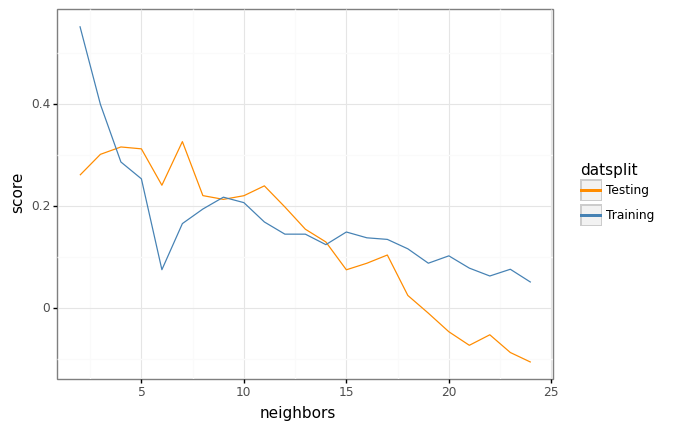

<ggplot: (8782414952834)>

In [51]:
(ggplot(score_df, aes(x='neighbors', y='score', color='datsplit'))+
geom_line()+
scale_color_manual(values=['darkorange', 'steelblue'])+
 theme_bw()
)

In [52]:
scoretrain_rf=[rf(n_estimators=100,
                max_depth=i).fit(train[['Volume', 'Weight']],
            train['CO2']).score(train[['Volume', 'Weight']],
            train['CO2']) for i in list(range(1,10))]


In [54]:
trainscore_rf=pd.DataFrame(scoretrain_rf, columns=["score"])

trainscore_rf['datsplit']='Training'
trainscore_rf['splits']=list(range(1, 10))

In [55]:
scoretest_rf=[rf(n_estimators=100,
                max_depth=i).fit(train[['Volume', 'Weight']],
            train['CO2']).score(test[['Volume', 'Weight']],
            test['CO2']) for i in list(range(1,10))]


In [57]:
testscore_rf=pd.DataFrame(scoretest_rf, columns=["score"])

testscore_rf['datsplit']='Testing'
testscore_rf['splits']=list(range(1, 10))

In [58]:
score_df_rf=pd.concat([trainscore_rf,testscore_rf], axis=0)

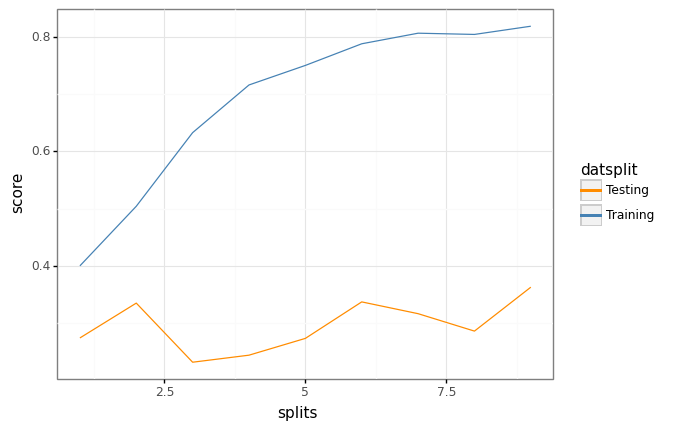

<ggplot: (8782445256346)>

In [60]:
(ggplot(score_df_rf, aes(x='splits', y='score', color='datsplit'))+
geom_line()+
scale_color_manual(values=['darkorange', 'steelblue'])+
 theme_bw()
)